# ÖN HAZIRLIK - LAB-4
# Ad-Soyad: Batuhan Karaoğlu
# Numara: 171024089


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
%matplotlib notebook

# Çalışma Soruları
## ÖnÇalışmaÖrnek7.pdf (Basit kesirlere ayrıştırma)

In [2]:
#3.2 
z = np.array([0]) # zeros
p = np.array([1.0/4, 1.0/2]) # poles
b, a = sig.zpk2tf(z, p, 1)  
b,a

(array([1., 0.]), array([ 1.   , -0.75 ,  0.125]))

In [3]:
#Alternative way:
a = sig.convolve(np.array([1, -1/4]), np.array([1, -1/2]))
a

array([ 1.   , -0.75 ,  0.125])

In [4]:
# partial fraction expression:
r, p, k = sig.residuez(b, a)
r, p, k

# to check the correctness of the polynomial roots:
poless = np.roots(a)  # returns the polynomial coef. of the denum.
print("r:{} p:{} k:{}".format(r,p,k))
print("poles:{} (for checking)".format(poless))
print(" r: is the Numerator of each term\n P:Poles of the system\n k: is the polynomial term (if any)")

r:[-1.  2.] p:[0.25 0.5 ] k:[]
poles:[0.5  0.25] (for checking)
 r: is the Numerator of each term
 P:Poles of the system
 k: is the polynomial term (if any)


## ÖnÇalışmaÖrnek8.pdf (Kuvvet Serilerine Açma)

[1.         0.75       0.4375     0.234375   0.12109375 0.06152344
 0.03100586 0.01556396 0.00779724 0.00390244]


<IPython.core.display.Javascript object>


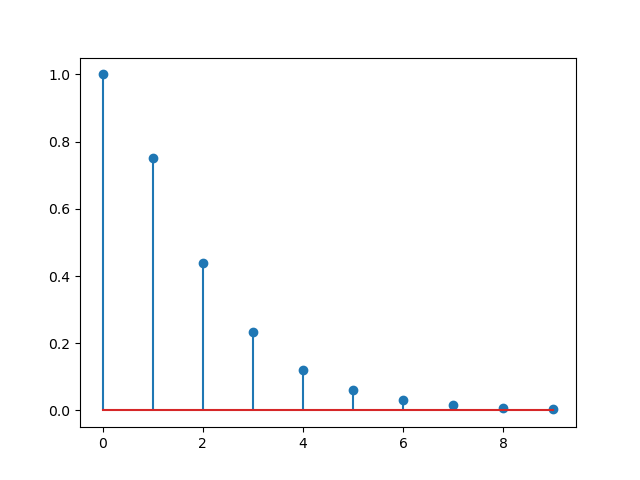

In [5]:
# 3.3 Kuvvet Serisine Açma
num = np.array([1, 0, 0])
denum = np.array([1, -3.0/4, 1.0/8])
n, x =sig.dimpulse((num, denum, 1), x0=0, n=10)
print(np.squeeze(x))
plt.figure()
plt.stem(n, np.squeeze(x) ,use_line_collection=True)
plt.show()

## ÖnÇalışmaÖrnek9.pdf

<IPython.core.display.Javascript object>


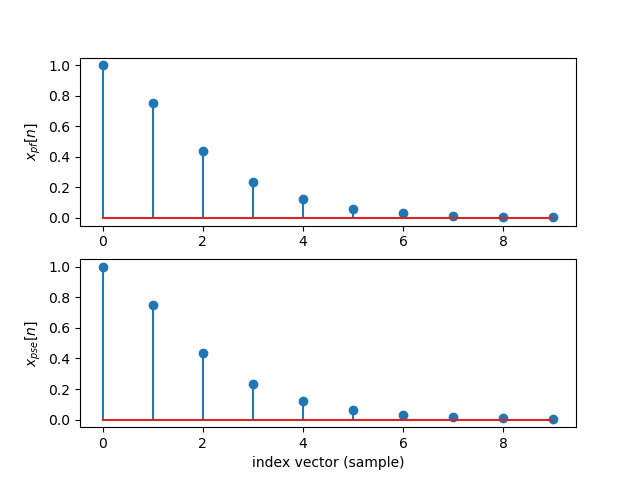

In [6]:
n = np.arange(0, 10, 1)
xpf = -(1.0/4)**n + 2*(1.0/2)**n  # Result of örnek7

num = np.array([1, 0, 0])
denum = np.array([1, -3.0/4, 1.0/8])
n1, xpse = sig.dimpulse((num, denum, 1),x0=0, n=10)
xpse = np.squeeze(xpse)
#plotting
plt.figure()
plt.subplot(211), plt.stem(n, xpf, use_line_collection=True), plt.ylabel("$x_{pf}[n]$")
plt.subplot(212), plt.stem(n, xpse, use_line_collection=True), plt.ylabel("$x_{pse}[n]$")
plt.xlabel("index vector (sample)")
plt.show()

## ÖnÇalışmaÖrnek10.pdf

<IPython.core.display.Javascript object>


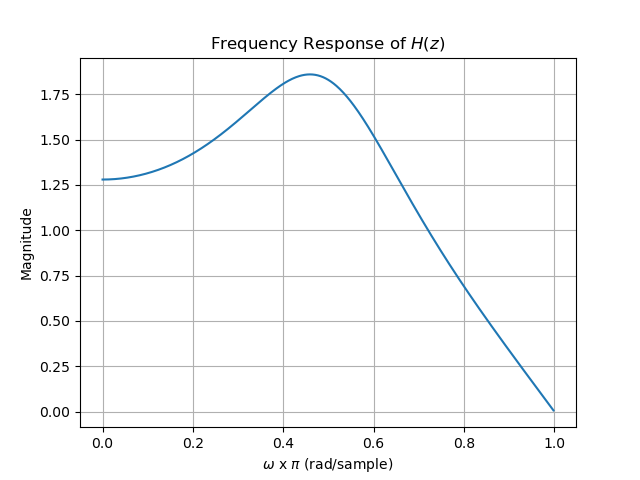

In [7]:
pi = np.pi
zeros = np.array([-1])
poles = np.array([-1j/2, 1j/2, -1.0/4])    # PDF te burdaki kısımda kutupların işareti hatalıydı!!!

w, H = sig.freqz_zpk(zeros, poles, 1)

plt.figure()
plt.plot(w/pi, abs(H)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


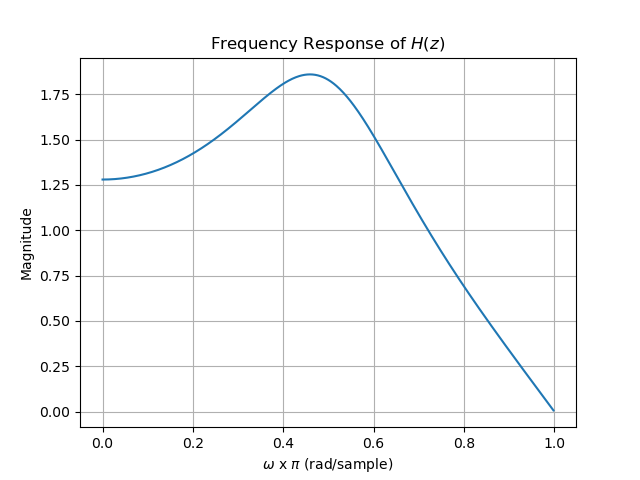

In [8]:
num, denum = sig.zpk2tf(zeros, poles, 1) 
w1, H_tf = sig.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


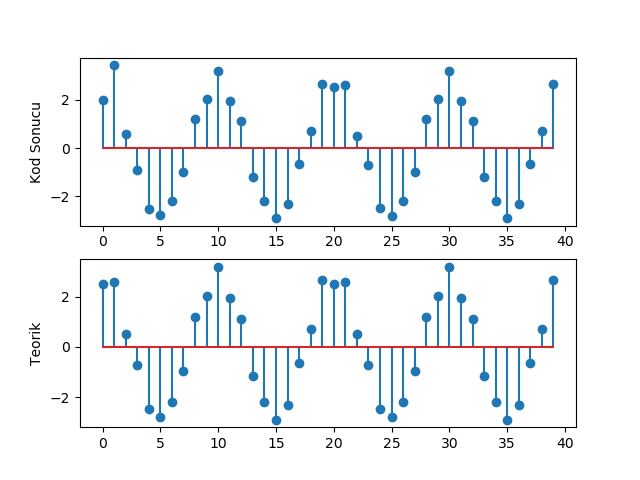

In [9]:
n = np.arange(0, 40, 1) 
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n) 
yn = sig.lfilter(num, denum, xn)

plt.figure()
plt.subplot(211)
plt.stem(n, yn,use_line_collection=True), plt.ylabel("Kod Sonucu")

#Theoritical:
plt.subplot(212)
y = 1.423*2*np.cos(0.2*pi*n + 0.02469) + 0.337*np.sin(0.9*pi*n - 1.4343)
plt.stem(n, y, use_line_collection=True), plt.ylabel("Teorik")

plt.show()

## ÖnÇalışmaÖrnek11.pdf  (zplane.py)

<IPython.core.display.Javascript object>


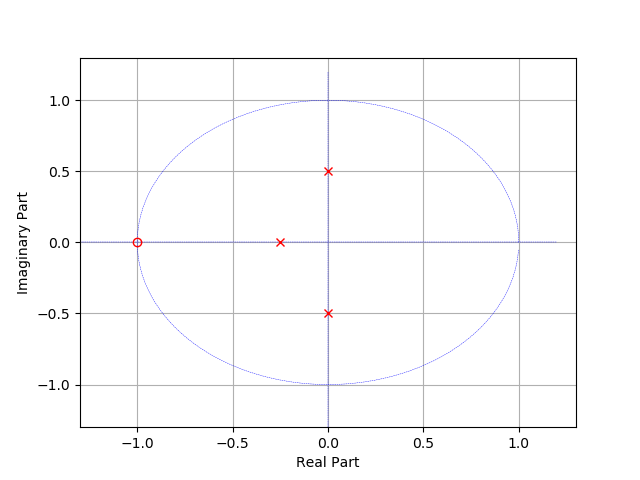

In [10]:
import zplane
zeross = np.array([-1])
poless = np.array([-1j/2, 1j/2, -1/4])
k = 1
b, a = sig.zpk2tf(zeross, poless, k)
zplane.zplane(b, a)

<IPython.core.display.Javascript object>


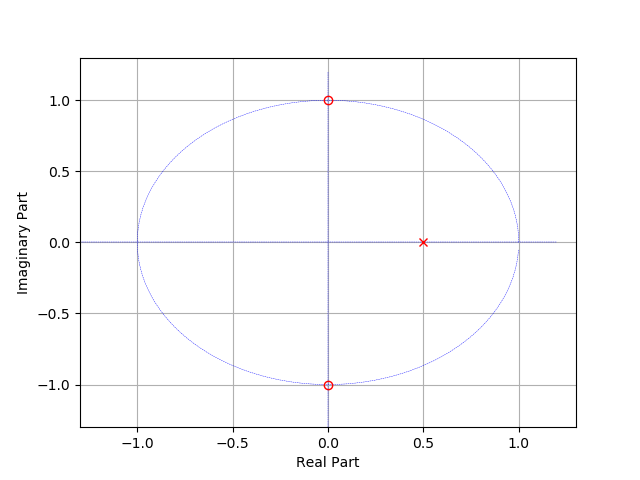

In [11]:
# Z-Transform -> Frequency Response
num = np.array([1, 0, 1])
denum = np.array([1, -1.0/2])

zplane.zplane(num, denum)

<IPython.core.display.Javascript object>


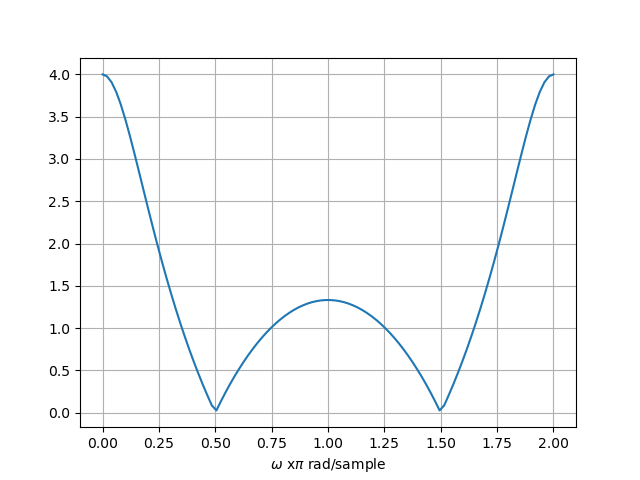

In [12]:
w = np.linspace(0, 2*pi, 100)
Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
Hw_abs = abs(Hw)

plt.figure()
plt.plot(w/pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')
plt.show()

# Ön Hazırlık Soruları
## SORU 1)
### $ y[n] - \frac{1}{2}y[n-1] + 4y[n-2] - 2y[n-3] = x[n] + \frac{2}{3}x[n-1] + \frac{1}{9}x[n-2]  $
## a) 
Sistem fonksiyonu:
# $ H(z) = \frac{1 + \frac{2}{3}z^{-1} + \frac{1}{9}z^{-2}}{1 - \frac{1}{2}z^{-1} + 4z^{-2} - 2z^{-3}} $

## b)
Sistemin kutup - sıfır diyagramı:

<IPython.core.display.Javascript object>


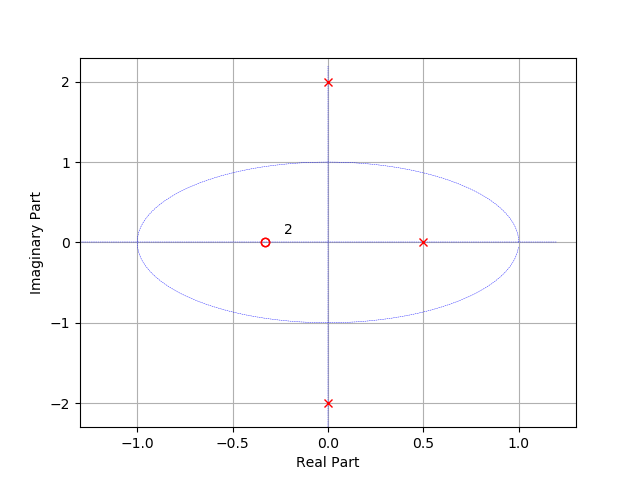

In [13]:
num = np.array([1, 2.0/3, 1.0/9])
denum = np.array([1, -1.0/2, 4, -2])

zplane.zplane(num, denum)

## c) 
### c1) 
ROC bölgesini h[n] = 0, n<0 için belirleyelim: Bu durum sistemin nedensel olduğunu ifade eder. Sistem sağ yanlıdır.
Nedensel sistemin(sağ-yanlı) ROC bölgesi dışa doğru olmalıdır.

ROC: $ |z| > 2  $ olur.

### c2)
Eğer sistemin Fourier Dönüşümü var ise sistemim ROC'u birim çemberi içeriyor demektir.Bu durumda:

ROC: $ \frac{1}{2} < |z| < 2 $ olur.

## d) 
c1 durumu için sistemi dürtü cevabını bulalım.

<IPython.core.display.Javascript object>


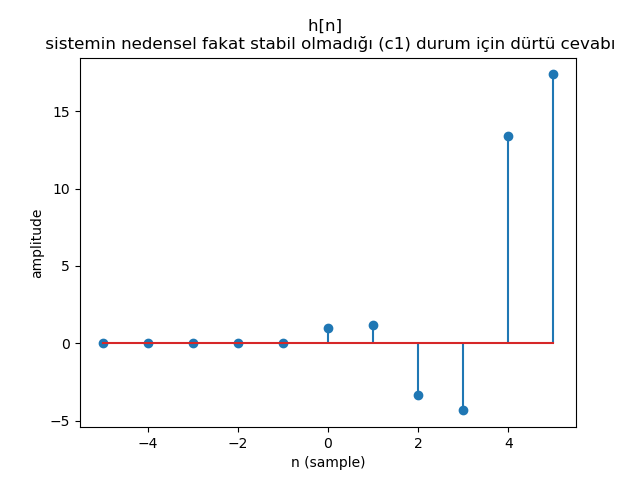

In [14]:
n = np.arange(-5,6,1)
zeros = np.array([-1.0/3, -1.0/3])
poles = np.array([2j, -2j, 1.0/2])
b,a = sig.zpk2tf(zeros, poles, 1)  #b = coeff of X(z)  a = coeff of Y(z)
impulse = np.array([1 if i == 0 else 0 for i in n])
h_n = sig.lfilter(b, a, impulse)

plt.figure()
plt.stem(n, h_n, use_line_collection=True)
plt.ylabel("amplitude"), plt.xlabel("n (sample)")
plt.title("h[n] \n sistemin nedensel fakat stabil olmadığı (c1) durum için dürtü cevabı")
plt.show()

Burada gördüğümüz üzere n arttıkça h[n] artmaktadır. Sınırlı bir çıkışımız yoktur. Yani h[n] mutlak toplanabilir değildir. Bu nedenle bu sistemin kararsız olduğunu söyleyebiliriz.

## e)
Bu sistem aynı anda hem nedensel hem kararlı olamaz. Çünkü elimizde yukarıda da gösterildiği gibi c1 ve c2 olmak üzere 2 uygulanabilir ROC durumu bulunmaktadır. Bu durumlar için hem birim çemberi içerip hem dışa doğru olan bir ROC aralığı oluşturulamaz.

Sistem fonksiyonunu, $ H(z) = \frac{1 + \frac{2}{3}z^{-1} + \frac{1}{9}z^{-2}}{1 - \frac{1}{2}z^{-1} + 4z^{-2} - 2z^{-3}} $ şeklinde bulmuştuk.

Belirtilen $H(z)$ denklemini kutuplardan yola çıkarak çarpanlara ayrılmış şekilde ifade edersek:

### $ H(z)=\frac{(1+\frac{1}{3}z^{-1})^{2}}{-2(z^{-1} +\frac{1}{2j})(z^{-1} -\frac{1}{2j})(z^{-1}-2 )} $

$ H(z)$ yi  $ (z^{-1} +\frac{1}{2j})(z^{-1} -\frac{1}{2j}) $ çarpanı ile çarparsak 2j ve -2j kutuplarından kurtuluruz.

### $ H(z)=(z^{-1} +\frac{1}{2j})(z^{-1} -\frac{1}{2j})  \frac{(1+\frac{1}{3}z^{-1})^{2}}{-2(z^{-1} +\frac{1}{2j})(z^{-1} -\frac{1}{2j})(z^{-1}-2 )} $ = $ \frac{(1+\frac{1}{3}z^{-1})^{2}}{-2(z^{-1} -2 )} $ 

Sistem fonksiyonumuz $ H(z)=\frac{(1+\frac{1}{3}z^{-1})^{2}}{-2(z^{-1} -2 )} $         ROC:  $ |z|>\frac{1}{2} $ şeklinde olur. Bu durumda sistem hem nedensel hem de kararlı olabilir.

# f) 
(e) şıkkında bulunan sistemin kutup-sıfır diyagramı ve dürtü cevabı:

### $ H(z) = \frac{(1+\frac{1}{3}z^{-1})^{2}}{-2(z^{-1} -2 )} $ 

<IPython.core.display.Javascript object>


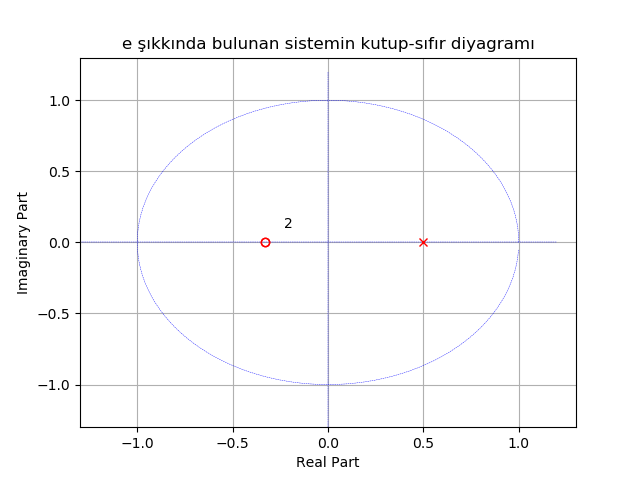

In [28]:
num = np.array([1, 2.0/3, 1.0/9]) # coeff.s of X(z)
denum = np.array([4, -2]) # coeff.s of Y(z)

zplane.zplane(num, denum)
plt.title("e şıkkında bulunan sistemin kutup-sıfır diyagramı")
plt.show()

<IPython.core.display.Javascript object>


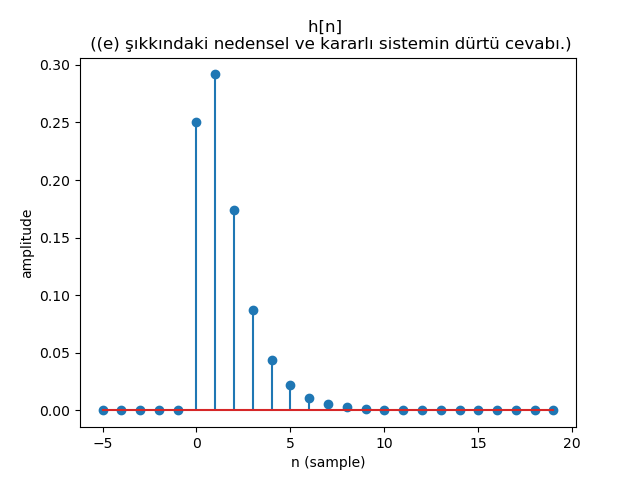

In [29]:
n = np.arange(-5,20,1)
impulse = np.array([1 if i == 0 else 0 for i in n])

h = sig.lfilter(num, denum, impulse)
plt.figure()
plt.stem(n, h, use_line_collection=True)
plt.title("h[n] \n ((e) şıkkındaki nedensel ve kararlı sistemin dürtü cevabı.)"), 
plt.xlabel("n (sample)"), plt.ylabel("amplitude")
plt.show()

Sistemin kutup noktası olan $ \frac{1}{2} $ değeri, dürtü cevabı üzerinde yükseltici bir etki yapmıştır. Ayrıca n değeri 1 olana kadar dürtü cevabının genliği artmakta birim çemberin dışına doğru olan bölgede dürtü cevabının genliği sıfıra yakınsamaktadır. Kutup noktamız birim çemberin içinde ve dışa doğru olduğundan sistemin dürtü cevabı hem nedensen hem de kararlı çıkmıştır.

# g)
Sistemin kutup-sıfır diyagramına baktığımızda $ -\frac{1}{3} $ noktasında çift katlı sıfırı, $ \frac{1}{2} $ noktasında 1 adet kutbu olduğunu görmekteyiz. "ÖnÇalışmaÖrnek11.pdf'te" gördüğümüz üzere sıfırlar frekans cevabında genliği azaltmakta, kutuplar ise arttırmaktadır. Bu sistem için çift katlı sıfırın bulunduğu açının, birim çember üzerinde $ -\pi $ veya $ \pi $ olduğunu görmekteyiz. Bu çerçevede kesim frekansımız sıfırların bulunduğu $ w = -\pi  $ veya $ w = \pi $ noktaları olarak belirlenir.

<IPython.core.display.Javascript object>


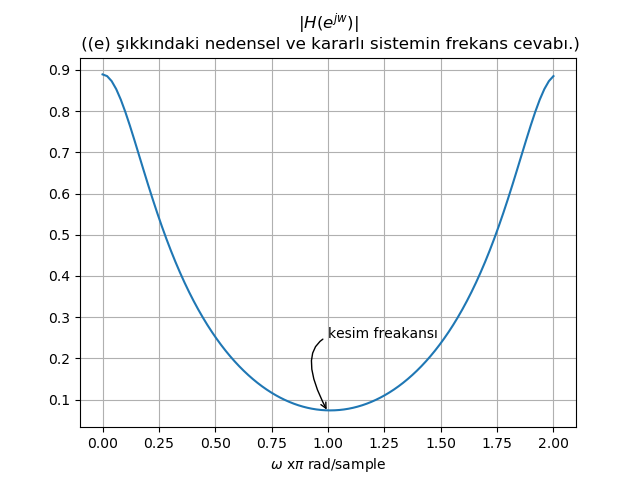

In [17]:
w = np.linspace(0, 2*pi, 100)
H = fft(h,100)
plt.figure()
plt.plot(w/pi, np.abs(H)), plt.grid()
plt.title("$ |H(e^{jw})| $\n ((e) şıkkındaki nedensel ve kararlı sistemin frekans cevabı.)")
plt.xlabel('$\omega$ x$\pi$ rad/sample')
# Kesim frekansını göstermek için grafiği işaretliyoruz.
plt.annotate(u"kesim freakansı", (1,0.07), (1, 0.25),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=1"))
plt.show()

Şekilde görüldüğü üzere kesim frekansımız beklediğimiz gibi $ \pi $ noktasındadır. Kutup değerinin bulunduğu $ 0 $ ve $ 2\pi $ noktalarında genlik artmıştır. 